<font size='6'> Fairfax County Housing Values: Linear Regression </font> <br style = 'line-height: 50px;'>
This project applies regression techniques to predict future housing market values for Fairfax County, VA. This area has experienced rapid development in the past and it would be insightful to see what the future could hold for this county, and by extension, the greater DC Metropolitan Area.

# Preparing the data
All data used for this project was obtained from the [Fairfax County website's demographic reports](https://www.fairfaxcounty.gov/demographics/reports). It spans the years from 1991 to 2018 and includes the estimated population, number of households, the number of housing units, median household income, and the median market value for each year. <br>
<font size='1.5'> *****Note that some data for the median household income is missing and will be dealt with appropriately**</font>

In [1]:
# Importing the libraries
from sklearn.impute import SimpleImputer
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

# Displaying all cell outputs
InteractiveShell.ast_node_interactivity = 'all'
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Importing the dataset
df = pd.read_csv(
    'https://rahbarprojects.s3.amazonaws.com/fairfax_county_housing.csv')
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

# Filling in missing data
imputer = SimpleImputer()
imputer = imputer.fit(X[:, 3:4])
X[:, 3:4] = imputer.transform(X[:, 3:4])

# Converting float values to int
X = X.astype(int)

A look at the input and output variable data:

In [2]:
pd.DataFrame(X, columns=df.columns[1:5]).head()
pd.DataFrame(y, columns=[df.columns[5]]).head()

,population,households,units,med_household_income
0,827119,296300,308202,61000
1,837141,301900,312324,94082
2,851858,307000,316723,64000
3,863100,312000,322007,94082
4,879401,317000,328151,70000


,med_market_value
0,190100
1,183700
2,183500
3,184400
4,186800


And the data, plotted side by side :

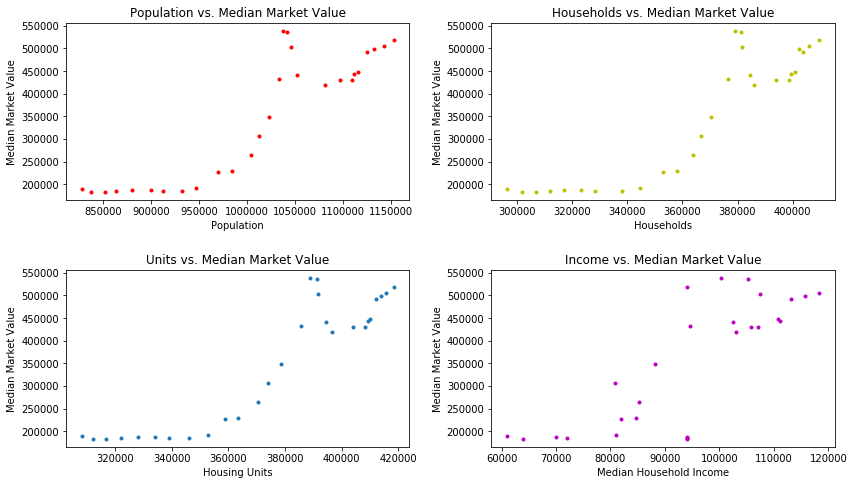

In [3]:
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.125, right=1.0, bottom=0.3,
                    top=0.9, wspace=2.0, hspace=3.0)

# Population vs. Market Value
ax1 = fig.add_subplot(321)
plt.scatter(X[:, 0], y, c='r', marker='.')
plt.title('Population vs. Median Market Value')
plt.xlabel('Population')
plt.ylabel('Median Market Value')

# Households vs. Market Value
ax2 = fig.add_subplot(322)
plt.scatter(X[:, 1], y, c='y', marker='.')
plt.title('Households vs. Median Market Value')
plt.xlabel('Households')
plt.ylabel('Median Market Value')

# Units vs. Market Value
ax3 = fig.add_subplot(323)
plt.scatter(X[:, 2], y, marker='.')
plt.title('Units vs. Median Market Value')
plt.xlabel('Housing Units')
plt.ylabel('Median Market Value')

# Income vs. Market Value
ax4 = fig.add_subplot(324)
plt.scatter(X[:, 3], y, c='m', marker='.')
plt.title('Income vs. Median Market Value')
plt.xlabel('Median Household Income')
plt.ylabel('Median Market Value')

plt.tight_layout(pad=1, w_pad=1, h_pad=1);

# Analysis/Modeling

For this project, a multivariate linear regression model will be reduced using backward elimination. 

In [4]:
import statsmodels.formula.api as sm

# Appending constant term
X = np.append(arr=np.ones((28, 1)).astype(int), values=X, axis=1)

# Model with all input variables
optim_X = X[:, [0, 1, 2, 3, 4]]
reg_OLS = sm.OLS(endog=y, exog=optim_X).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     60.58
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           7.04e-12
Time:                        21:32:03   Log-Likelihood:                -336.48
No. Observations:                  28   AIC:                             683.0
Df Residuals:                      23   BIC:                             689.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.365e+06   1.35e+05    -10.112      0.000   -1.64e+06   -1.09e+06
x1            -2.9785      1.020     -2.920      0.008      -5.088      -0.869
x2           -18.9803      5.683     -3.340      0.003     -30.736      -7.225
x3            31.1133      6.352      4.898      0.000      17.974      44.253
x4             0.1183      0.952      0.124      0.902      -1.850       2.087
==============================================================================
Omnibus:                        2.314   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.267
Skew:                           0.153   Prob(JB):                        0.531
Kurtosis:                       2.004   Cond. No.                     1.85e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the results above, the variable that had the least significance upon the median market value was the median household income, with a p-value of 0.902, so that will be removed. 

In [5]:
# Model with median income removed
optim_X = X[:, [0, 1, 2, 3]]
reg_OLS = sm.OLS(endog=y, exog=optim_X).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     84.22
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           7.02e-13
Time:                        21:32:03   Log-Likelihood:                -336.49
No. Observations:                  28   AIC:                             681.0
Df Residuals:                      24   BIC:                             686.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.372e+06   1.19e+05    -11.581      0.000   -1.62e+06   -1.13e+06
x1            -2.9892      0.995     -3.004      0.006      -5.043      -0.935
x2           -19.1967      5.297     -3.624      0.001     -30.129      -8.264
x3            31.4029      5.786      5.427      0.000      19.461      43.345
==============================================================================
Omnibus:                        2.328   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.252
Skew:                           0.132   Prob(JB):                        0.535
Kurtosis:                       1.998   Cond. No.                     1.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the remaining input variables have a high significance to our output variable, with all having p-value less than 0.01. We have now narrowed the input variables with the highest significance to our output to be the the population, the number of households, and the number of housing units, and have built our optimal regression model. Now we will split up our data into training and testing sets and train our model on the latter.

In [6]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(optim_X, y, test_size=1/3)

# Training model on testing set
y_pred = reg_OLS.predict(X_test);

# Results
To get a visual representation of the difference between actual and predicted values for the median housing value, we plot it, with a slope closer to 1 indicating a better estimation by the model and vice-versa. A line of best fist is plotted as well to better illustrate this.

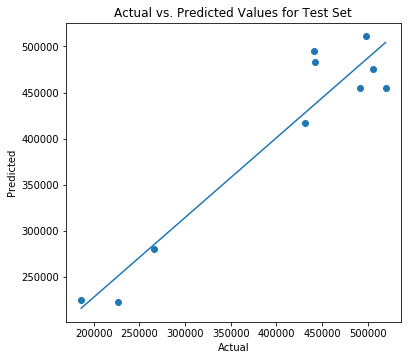

In [7]:
%matplotlib inline

fig = plt.figure(figsize=(6, 5.5))

# Actual vs Predicted Values
ax = fig.add_subplot(111)
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(np.unique(y_test), np.poly1d(
    np.polyfit(y_test, y_pred, 1))(np.unique(y_test)));

We will use the root mean squared error between the actual and predicted values for median housing value to get a better sense of how reliable the model is.

In [10]:
# Mean Absolute Error
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse
r2

31108.827493875335

0.9071703330028483

# Conclusions and Next Steps
Summarize findings here